In [ ]:
# import netCDF4
import numpy as np
from datetime import datetime
# import pyplume as pl
# import pyplumeWRF as plwrf
import xarray as xr 

def WRF2npy_skip(datatype,path,skip):
    ds = xr.open_mfdataset(path+'/wrfout*',concat_dim="Time",combine='nested')
    dtest = ds["T"];totaltime,nz,ny,nx = dtest.shape;
    nt = int(totaltime/skip);
    if (datatrim  != False): nx=datatrim; ny = datatrim;
    data = np.zeros([nx,ny,nz,nt]);
    for t in range(0,nt): 
        temp = plwrf.loadCDF(ds,datatype,t*skip,(t*skip)+1,trim = datatrim,reshape=True);
        data[:,:,:,t] = np.squeeze(temp);
    savepath = path+"npy";
    pl.makefolder(savepath);
    np.save(savepath+"/"+datatype,data)
    print(savepath);
    print("Saved "+datatype);

def WRF2npy_range(datatype,path,t0,t1):
    ds = xr.open_mfdataset(path+'/wrfout*',concat_dim="Time",combine='nested')
    dtest = ds["T"];totaltime,nz,ny,nx = dtest.shape;print("Total Time:", totaltime);
    nt = int(totaltime/skip);
    data = plwrf.loadCDF(ds,datatype,t0,t1,trim = datatrim,reshape=True);
    savepath = path+"npy";
    pl.makefolder(savepath);
    np.save(savepath+"/"+datatype,data)
    print("Saved "+datatype);

def WRF2npy_mean(datatype,path):
    D = xr.open_mfdataset(path+'/wrfout*',concat_dim="Time",combine='nested')
    # dtest = ds["T"];totaltime,nz,ny,nx = dtest.shape;print("Total Time:", totaltime);
    D = D[datatype]
    Dmean = D.mean("Time")
    Dmean = np.array(Dmean)
    print(np.shape(Dmean))

In [ ]:
if __name__ == '__main__':

    print("Converting WRF files into .npy files")
    # path = r'/scratch/07528/ihd758/cbl.ch4.u.5.h.2.0/a.wrfout'
    path = r'D:\nbl.co2.h.2.5'
    dx = 40; dy = 40; dz =10
    datatrim = False;
    skip = 10;
    start_time = datetime.now()
    ds = xr.open_mfdataset(path+'/wrfout*',concat_dim="Time",combine='nested')
    dtest = ds["T"];totaltime,nz,ny,nx = dtest.shape;print("Total Time:", totaltime);

    # datatype = "T"
    # WRF2npy_skip(datatype,ds,path,skip);
    # # WRF2npy_range(datatype,ds,path,t0,t1);
    # print("Loaded T");


    datatype = "T"
    ds = xr.open_mfdataset(path+'/wrfout*',concat_dim="Time",combine='nested')
    
    end_time = datetime.now()
    print("Total Time Series:", end_time - start_time)

In [ ]:
D = ds[datatype]

In [ ]:
Dmean = D.mean("Time")

In [ ]:
Dmean

In [12]:
import numpy as np
D = np.load(r"D:\nbl.co2.h.2.5npy\T_mean.npy")
print(np.shape(D))

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\nbl.co2.h.2.5npy\\T_10.npy'

TypeError: Input z must be 2D, not 3D

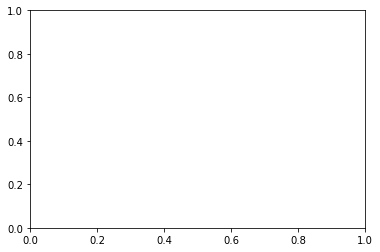

In [11]:
import matplotlib.pyplot as plt
plt.contourf(D[:,:,:])